## Creating a Simple FITS file with two sources and a random backgound - simple process

Creation of a Spherical-cow image with a random background, two "nearby" sources and process with a kernel

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits



In [4]:
#create a 100x100 array of random numbers, call it background

backgr = np.random.random((100,100))

#now, choose two central points and assign values 10 and 15


backgr[45][50]=10.0
backgr[49][52]=15.0

#also chose a few other random points, not close to each other

backgr[20][30]=7.0 
backgr[65][72]=8.0
backgr[24][43]=9.0
backgr[32][54]=7.0
backgr[80][10]=12.0
backgr[85][25]=9.0


#Let's create a fits file now

hdu = fits.PrimaryHDU()
hdu.data=backgr

hdu.writeto('unprocessed.fits', clobber = True)


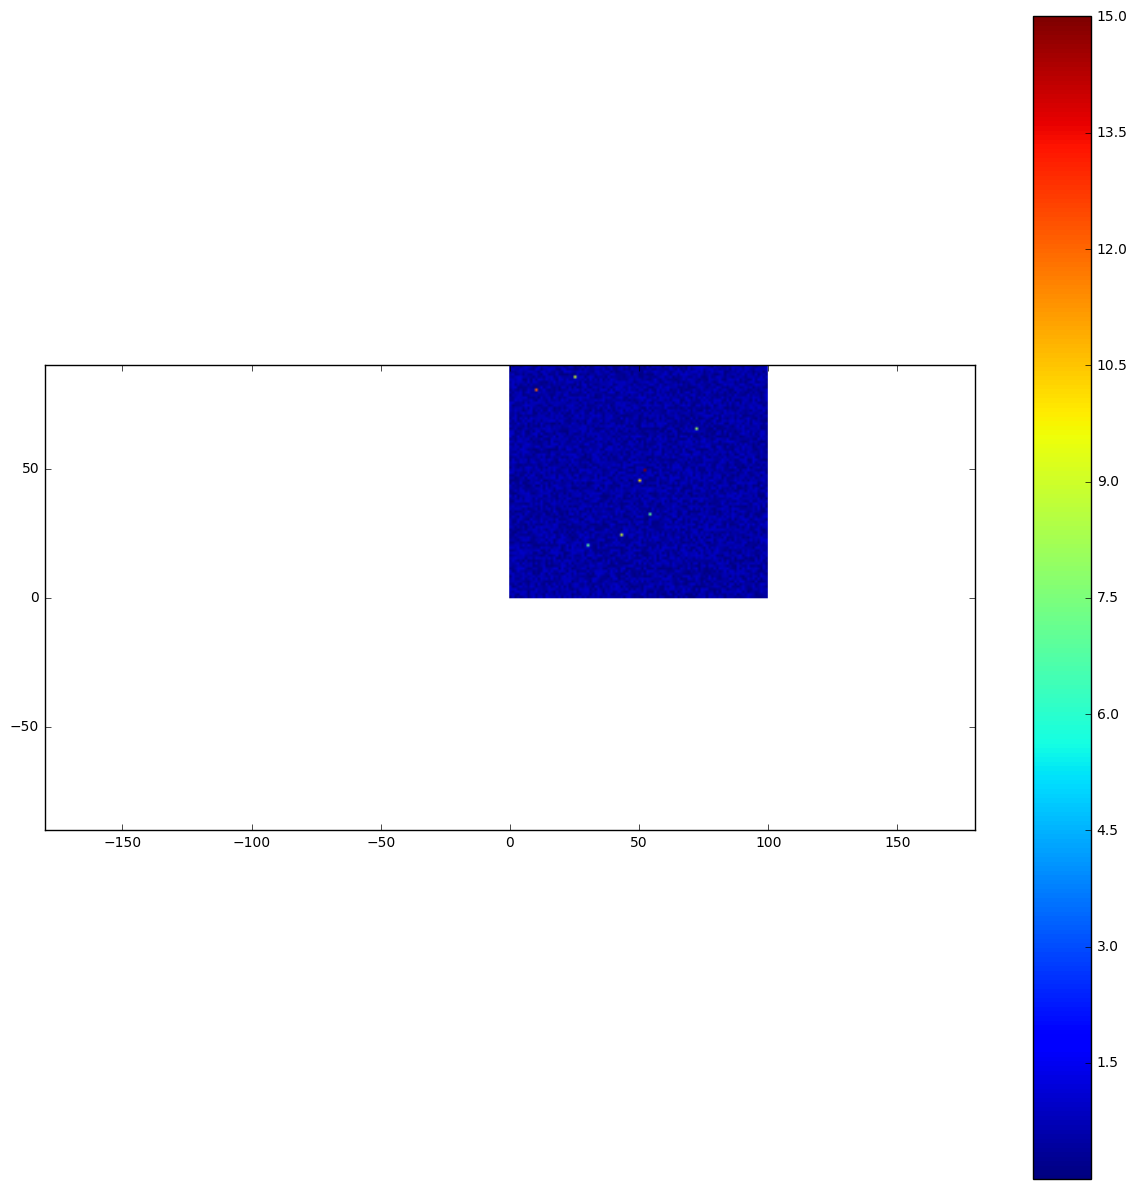

In [5]:
fig=plt.figure(figsize=(15.0, 15.0))
plt.imshow(hdu.data)
plt.autoscale(False)
plt.xlim(-180.0,180.0)
plt.ylim(-90.0,90.0)
plt.colorbar()


Let's now plot the HDU 

It's now time to process the signal. Let's construct a simple gaussian Kernel. Without a particular reason, let us choose this to be $11 \times 11$.

In [6]:
# kreate an empy array

kern = np.zeros((11,11))


#Let's populate it now. Define central point

centx = 6
centy = 6

# Let's define standard deviation to be 3

sigma = 3.0
factor = 1.0/np.sqrt(2*np.pi*(sigma**2))

#populate the kernel, using a discretized gaussian. At the same time, let's keep track of the sum of all points, in order to normalize

summa = 0.0

for x in range (0,10):
    for y in range (0,10):
        kern[x][y]= factor*np.exp(-((x - centx)**2+(y - centy)**2)/(2.0*sigma**2))
        summa = summa + kern[x][y]
        

#now normalize


for x in range (0,10):
    for y in range (0,10):
        kern[x][y]=kern[x][y]/summa
    
        


Let's now convolve this to the original signal

In [7]:
hdulist = fits.open('unprocessed.fits')

unproc = hdulist[0].data

#unproc is the background we had above, we just uploaded that again

#Now x, y are indices running on the grid of the processed and unprocessed signal and  i,j are indices running on the grid of filter

proc = np.zeros((100,100))

#Note we can do the convolution not to the whole grid, but only to an inner grid 



for x in range (6,93):
    for y in range (6,93):
        for i in range (0,10):
            for j in range (0,10):
                proc[x][y]=proc[x][y]+(kern[i][j])*(unproc[x + i - centx][y + j - centy])
                
                

hdu = fits.PrimaryHDU()
hdu.data=proc

hdu.writeto('processed.fits', clobber = True)

                

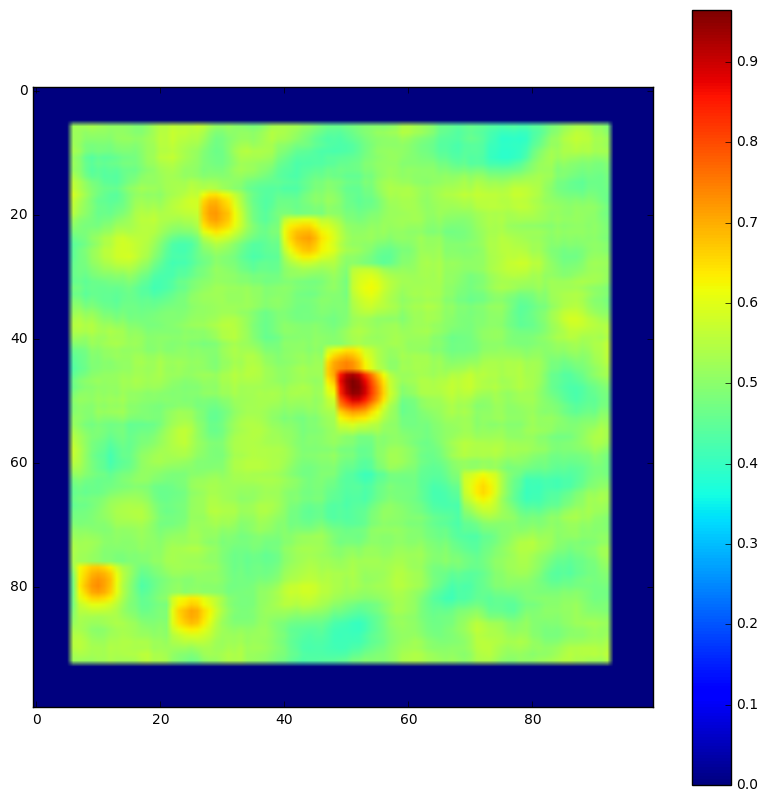

In [8]:
fig=plt.figure(figsize=(10.0, 10.0))
plt.imshow(hdu.data)
plt.colorbar()